In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
print(os.listdir("../input/leapgestrecog/leapGestRecog"))

# Any results you write to the current directory are saved as output.

['02', '00', '03', '06', '05', '09', '08', '07', '04', '01']


In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.image as mpimg 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display
path='../input/leapgestrecog/leapGestRecog'
folders=os.listdir(path)
folders=set(folders)

import codecs
import json


different_classes=os.listdir(path+'/'+'00')
different_classes=set(different_classes)




print("The different classes that exist in this dataset are:")
print(different_classes,sep='\n')

The different classes that exist in this dataset are:
{'05_thumb', '06_index', '07_ok', '02_l', '08_palm_moved', '03_fist', '10_down', '09_c', '01_palm', '04_fist_moved'}


In [3]:
x=[]
z=[]
y=[]#converting the image to black and white
threshold=200
import cv2


for i in folders:
    print('***',i,'***')
    subject=path+'/'+i
    subdir=os.listdir(subject)
    subdir=set(subdir)
    for j in subdir:
        print(j)
        images=os.listdir(subject+'/'+j)
        for k in images:
            results=dict()
            results['y']=j.split('_')[0]
            img = cv2.imread(subject+'/'+j+'/'+k,0)
            img=cv2.resize(img,(int(160),int(60)))
            
            ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            imgD=np.asarray(img,dtype=np.float64)
            z.append(imgD)
            imgf=np.asarray(imgf,dtype=np.float64)
            x.append(imgf)
            y.append(int(j.split('_')[0]))
            results['x']=imgf

print(list(set(y)))
        
# import pandas as pd 
# df=pd.DataFrame({'x':x,'y':y})
# df.to_csv('results.csv',index=False)

*** 06 ***
05_thumb
06_index
07_ok
02_l
08_palm_moved
03_fist
10_down
09_c
01_palm
04_fist_moved
*** 08 ***
05_thumb
06_index
07_ok
02_l
08_palm_moved
03_fist
10_down
09_c
01_palm
04_fist_moved
*** 04 ***
05_thumb
06_index
07_ok
02_l
08_palm_moved
03_fist
10_down
09_c
01_palm
04_fist_moved
*** 05 ***
05_thumb
06_index
07_ok
02_l
08_palm_moved
03_fist
10_down
09_c
01_palm
04_fist_moved
*** 00 ***
05_thumb
06_index
07_ok
02_l
08_palm_moved
03_fist
10_down
09_c
01_palm
04_fist_moved
*** 01 ***
05_thumb
06_index
07_ok
02_l
08_palm_moved
03_fist
10_down
09_c
01_palm
04_fist_moved
*** 02 ***
05_thumb
06_index
07_ok
02_l
08_palm_moved
03_fist
10_down
09_c
01_palm
04_fist_moved
*** 03 ***
05_thumb
06_index
07_ok
02_l
08_palm_moved
03_fist
10_down
09_c
01_palm
04_fist_moved
*** 07 ***
05_thumb
06_index
07_ok
02_l
08_palm_moved
03_fist
10_down
09_c
01_palm
04_fist_moved
*** 09 ***
05_thumb
06_index
07_ok
02_l
08_palm_moved
03_fist
10_down
09_c
01_palm
04_fist_moved
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10

Class Label: 1


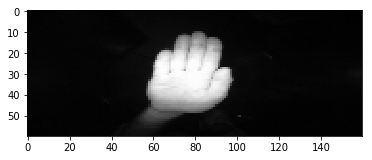

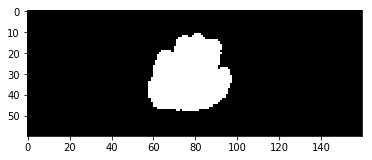

Class Label: 2


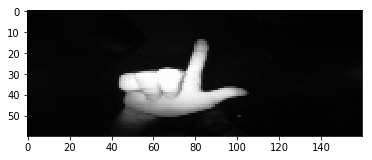

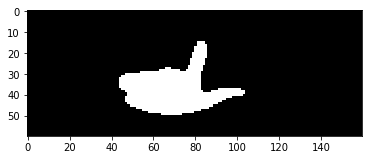

Class Label: 3


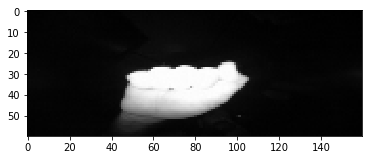

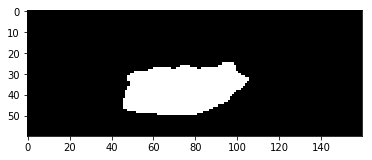

Class Label: 4


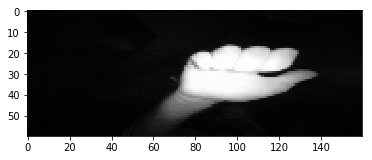

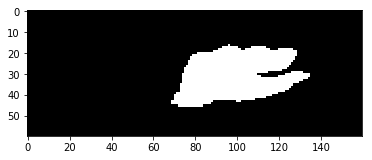

Class Label: 5


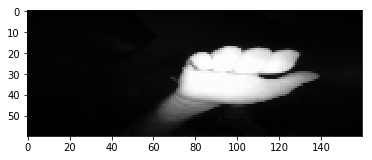

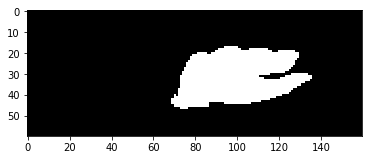

Class Label: 6


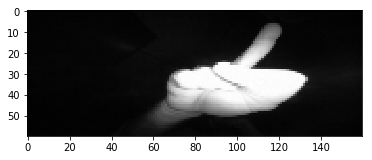

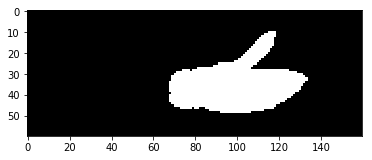

Class Label: 7


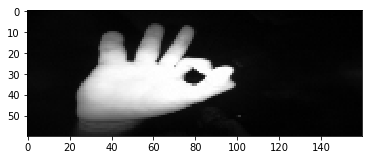

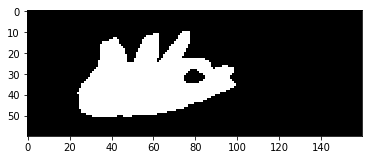

Class Label: 8


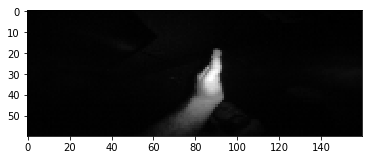

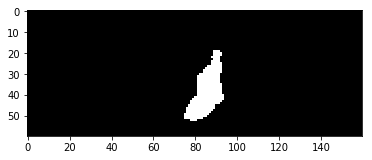

Class Label: 9


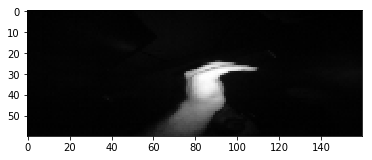

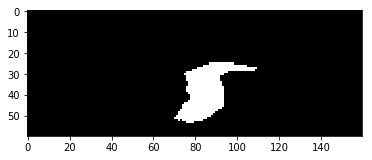

Class Label: 10


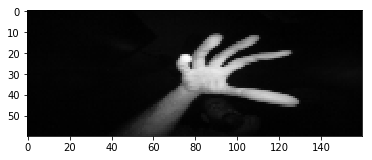

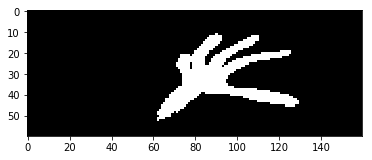

In [4]:
#sample black and white image from each class
l = []
list_names = []
for i in range(10):
    l.append(0)
for i in range(len(x)):
    if(l[y[i] - 1] == 0):
        l[y[i] - 1] = i
        if(len(np.unique(l)) == 10):
            break
for i in range(len(l)):
    %matplotlib inline
    print("Class Label: " + str(i + 1))
    plt.imshow(np.asarray(z[l[i]]), cmap  =cm.gray)
    plt.show()
    plt.imshow(np.asarray(x[l[i]]), cmap = cm.gray)     
    plt.show()

In [5]:
x=np.array(x)
y=np.array(y)
y = y.reshape(len(x), 1)
print(x.shape)
print(y.shape)
print(max(y),min(y))

(20000, 60, 160)
(20000, 1)
[10] [1]


In [6]:
x_data = x.reshape((len(x), 60, 160, 1))

x_data/=255
x_data=list(x_data)
for i in range(len(x_data)):
    x_data[i]=x_data[i].flatten()

## PCA to the data

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x_data=np.array(x_data)
x_data=pca.fit_transform(x_data)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

[0.25498139 0.08075452 0.06690615 0.041779  ]
[1529.79553924  860.91952673  783.6320034   619.23884367]


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y,test_size = 0.2)


## SGD classifier

In [9]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

X_train = scaler.transform(x_train)  
X_test = scaler.transform(x_further)  

In [10]:
from sklearn.linear_model import SGDClassifier
sgd= SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test) 
y_train_score_sgd=sgd.predict(X_train)
from sklearn.metrics import accuracy_score
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_sgd, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_sgd, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.20525
Train 0.192375


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
y_pred_knn = classifier.predict(X_test)  

In [13]:
y_train_score_knn=classifier.predict(X_train)

In [14]:
from sklearn.metrics import accuracy_score
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_knn, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_knn, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.9645
Train 0.98125


## Decision tree

In [15]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)

In [16]:
y_pred_dt=clf.predict(X_test)
y_train_score_dt=clf.predict(X_train)

In [17]:
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_dt, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_dt, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.84275
Train 0.8703125


## Random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf_rft = RandomForestClassifier(n_estimators=100, max_depth=15,random_state=0)
clf_rft = clf_rft.fit(X_train, y_train)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
y_pred_rft=clf_rft.predict(X_test)
y_train_score_rft=clf_rft.predict(X_train)

In [20]:
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_rft, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_rft, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.97
Train 0.9968125


## Logistic Regression

In [21]:


from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver = 'lbfgs')
logistic.fit(X_train, y_train)
y_pred_logistic=logistic.predict(X_test)
y_train_score_logistic=logistic.predict(X_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_logistic, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_logistic, normalize=True, sample_weight=None))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy of the model is:
Test  0.2865
Train 0.290625


## Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_test)
y_train_score_gnb=gnb.predict(X_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_gnb, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_gnb, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.29125
Train 0.298375


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## ANN

In [23]:
from sklearn.neural_network import MLPClassifier

ann_clf = MLPClassifier()
ann_clf.fit(X_train, y_train)
y_pred_ann=ann_clf.predict(X_test)
y_train_score_ann=ann_clf.predict(X_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_ann, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_ann, normalize=True, sample_weight=None))

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of the model is:
Test  0.861
Train 0.8739375


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Gradient Descent Classifier

In [24]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
gdc_model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
gdc_model.fit(x_train, y_train)
y_pred_gdc=gdc_model.predict(X_test)
y_train_score_gdc=gdc_model.predict(X_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_gdc, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_gdc, normalize=True, sample_weight=None))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of the model is:
Test  0.095
Train 0.10125


## SVM

In [25]:
from sklearn.svm import SVC 
svm_model_rbf = SVC(kernel = 'rbf', C = 10,probability=True).fit(X_train, y_train) 
y_pred_svm=svm_model_rbf.predict(X_test)
y_train_score_svm=svm_model_rbf.predict(X_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_svm, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_svm, normalize=True, sample_weight=None))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of the model is:
Test  0.8875
Train 0.902375


## Voting for all the models

In [26]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('logistic',logistic),('nb',gnb),('gdc',gdc_model),('ann',ann_clf),('clf_rft',clf_rft),('dt',clf),('sv',svm_model_rbf),('knn',classifier),('stochastic',sgd)],voting='soft')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_train_score=model.predict(X_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score, normalize=True, sample_weight=None))

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conver

accuracy of the model is:
Test  0.94975
Train 0.97225


## Stacking

In [27]:
stacking_xtest=[[y_pred_svm[i],y_pred[i],y_pred_ann[i],y_pred_rft[i],y_pred_dt[i],y_pred_knn[i],y_pred_sgd[i],y_pred_logistic[i],y_pred_gnb[i],y_pred_gdc[i]] for i in range(len(X_test))]
stacking_xtrain=[[y_train_score_svm[i],y_train_score[i],y_train_score_ann[i],y_train_score_rft[i],y_train_score_dt[i],y_train_score_knn[i],y_train_score_sgd[i],y_train_score_logistic[i],y_train_score_gnb[i],y_train_score_gdc[i]] for i in range(len(X_train))]


ann_stacking = MLPClassifier()
ann_stacking.fit(stacking_xtrain, y_train)
y_pred_stacking=ann_stacking.predict(stacking_xtest)
y_train_score_stacking=ann_stacking.predict(stacking_xtrain)
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_stacking, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_stacking, normalize=True, sample_weight=None))



/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of the model is:
Test  0.9685
Train 0.9984375


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [28]:
names=['Stochastic Gradient Classifier','K Nearest Neighbour','Decision Tree','Random Forest Tree','Logistic Regression','Naive Bayes','Artificial Neural Network','Gradient Descent Classifier','Support Vector Machine','Voting','Stacking']
all_models=[y_pred_sgd,y_pred_knn,y_pred_dt,y_pred_rft,y_pred_logistic,y_pred_gnb,y_pred_ann,y_pred_gdc,y_pred_svm,y_pred,y_pred_stacking]
all_training=[y_train_score_sgd,y_train_score_knn,y_train_score_dt,y_train_score_rft,y_train_score_logistic,y_train_score_gnb]
all_training+=[y_train_score_ann,y_train_score_gdc,y_train_score_svm,y_train_score,y_train_score_stacking]
testing_accuracy=[]
training_accuracy=[]
for i in all_models:
    testing_accuracy.append(accuracy_score(y_further, i, normalize=True, sample_weight=None))
for i in all_training:
    training_accuracy.append(accuracy_score(y_train, i, normalize=True, sample_weight=None))


In [29]:
import pandas as pd
df=pd.DataFrame({'Names':names,'Training Accuracy':training_accuracy,'Testing Accuracy':testing_accuracy})
df=df[['Names','Training Accuracy','Testing Accuracy']]
df

,Names,Training Accuracy,Testing Accuracy
0,Stochastic Gradient Classifier,0.192375,0.20525
1,K Nearest Neighbour,0.981250,0.96450
2,Decision Tree,0.870313,0.84275
3,Random Forest Tree,0.996812,0.97000
4,Logistic Regression,0.290625,0.28650
5,Naive Bayes,0.298375,0.29125
6,Artificial Neural Network,0.873938,0.86100
7,Gradient Descent Classifier,0.101250,0.09500
8,Support Vector Machine,0.902375,0.88750
9,Voting,0.972250,0.94975
